In [375]:
# This problem explores the impact of the given data sets on profits for two cab companies.  I start by exploring the data to be able to test hypothesis.
# The hypothesis that I will consider for this problem are:
    #1. There is significant difference of profit with the cab companies when considering age of the customer.
    #2. Cities have a significant influence on profits for cab companies.
    #3. Cost of the trip influences cab riding.
    #4.  Number of users and shorter distance traveled causes a difference in price of cab rides.
    #5.  Geographical area and their seasons can impact the number of cab rides.
    #6.  Customers under 40 provide a significant difference in profit
import pandas as pd
import numpy as np
import statistics
import sklearn
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
from math import sqrt


from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report


%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as scs
import scipy.stats as stats

import statsmodels.api as sm
from datetime import date, datetime, time

#Input and Read Data
#Input
df_cabdata=pd.read_csv('Cab_Data.csv')
df_city=pd.read_csv('City.csv')
df_customer=pd.read_csv('Customer_ID.csv')
df_transact=pd.read_csv('Transaction_ID.csv')

#Read
#df_cabdata
#df_city
#df_customer
#df_transact

#####################Explore Data
#check data type
df_cabdata.info()
df_city.info()
df_customer.info()
df_transact.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

In [376]:
#Check to see if there are any N/A
df_cabdata.isnull().sum().sort_values(ascending=False)

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [377]:
df_city.isnull().sum().sort_values(ascending=False)

City          0
Population    0
Users         0
dtype: int64

In [378]:
df_customer.isnull().sum().sort_values(ascending=False)

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [379]:
df_transact.isnull().sum().sort_values(ascending=False)

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [380]:
#Further explore data by finding more info regarding the data.
df_cabdata.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [381]:
df_city.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [382]:
df_transact.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [383]:
df_customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [384]:
df_customer.duplicated().sum()

0

In [385]:
df_city.duplicated().sum()

0

In [386]:
df_transact.duplicated().sum()

0

In [387]:
df_cabdata.duplicated().sum()

0

In [388]:
#Do a inner join on customer.csv and transact.csv to attach age and income to transaction ID
df_customertransact=pd.merge(df_customer, df_transact, how="inner", on="Customer ID")

In [389]:
#Check to make sure the files combined the way I wanted them to
df_customertransact.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID
count,440098.000000,440098.000000,440098.000000,4.400980e+05
mean,23619.513120,35.360197,15092.181989,1.022006e+07
std,21195.549816,12.582668,7987.309505,1.270455e+05
min,1.000000,18.000000,2000.000000,1.000001e+07
25%,3530.000000,25.000000,8391.000000,1.011004e+07
50%,15168.000000,33.000000,14767.000000,1.022006e+07
75%,43884.000000,42.000000,21084.000000,1.033008e+07
max,60000.000000,65.000000,35000.000000,1.044011e+07


In [390]:
#the goal is to combine Customer data with age and income to cab data.  Since I already combined Customer Data to transaction data now I can join that to cab data. Now I connected the customer ID to the Transaction ID which also shows in cabdata.
df_cabcustomertransact=pd.merge(df_customertransact, df_cabdata, how="inner", on="Transaction ID")
df_cabcustomertransact.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,21012.412463,12.594234,7969.409482,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [391]:
#Finally I can find out if there is relationships between popultion and cities with the file that I joined before.  Now I will have all the data merge so I can test different relationships.
#I lost some data from my first file with inner join but it is fine since the cab data was missing for that file and contains the information for price, costs and distance of the actual cab rides.
df_masterdata=pd.merge(df_cabcustomertransact, df_city, how="inner", on="City")

# 80707 rows are lost because cab data does not have information for some of the transaction IDs

In [392]:
#Now I can begin to explore the master data and what it contains
df_masterdata.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,21012.412463,12.594234,7969.409482,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [393]:
#Check the master data file for duplicates
df_masterdata.duplicated().sum()

0

In [394]:
#Check the master data file for null values
df_masterdata.isnull().sum().sort_values(ascending=False)

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Transaction ID        0
Payment_Mode          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
dtype: int64

In [395]:
# I will change categorical data to numerical data by using dummy variables and connecting new column information witht eh dummy variables.  then I can delete the original column.
# get the dummies and store it in a variable
dummies_gender= pd.get_dummies(df_masterdata.Gender)
dummies_paymentmode= pd.get_dummies(df_masterdata.Payment_Mode)
dummies_city= pd.get_dummies(df_masterdata.City)
dummies_company= pd.get_dummies(df_masterdata.Company)

# Concatenate the dummies_gender to original dataframe
df_masterdata = pd.concat([df_masterdata, dummies_gender], axis='columns')
df_masterdata=pd.concat([df_masterdata, dummies_paymentmode], axis='columns')
df_masterdata=pd.concat([df_masterdata, dummies_city], axis='columns')
df_masterdata=pd.concat([df_masterdata, dummies_company], axis='columns')

# drop the values
#df_masterdata.drop(['Gender', 'Female', 'Payment_Mode', 'Cash', 'City', 'Company'],axis=1, inplace=True)
#df_masterdata.drop(['Gender', 'Payment_Mode', 'City', 'Company'],axis=1, inplace=True)


df_masterdata.describe()
#Now all categorical values have been changed




,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Female,Male,...,PHOENIX AZ,PITTSBURGH PA,SACRAMENTO CA,SAN DIEGO CA,SEATTLE WA,SILICON VALLEY,TUCSON AZ,WASHINGTON DC,Pink Cab,Yellow Cab
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,...,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,0.427055,0.572945,...,0.005743,0.003653,0.006586,0.057007,0.022251,0.023704,0.005373,0.121697,0.235706,0.764294
std,21012.412463,12.594234,7969.409482,1.268058e+05,307.467197,12.233526,274.378911,157.993661,0.494651,0.494651,...,0.075565,0.060333,0.080887,0.231857,0.147501,0.152125,0.073103,0.326936,0.424440,0.424440
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [396]:
#Now I want to switch the general format to a date format and drop the original Date of Travel column
df_masterdata['Date Traveled'] = pd.to_datetime(df_masterdata['Date of Travel'], unit='D', origin='1899-12-30')
df_masterdata.drop('Date of Travel',axis=1, inplace=True)
df_masterdata['Price Charged per KM']=df_masterdata['Price Charged']/ df_masterdata['KM Travelled']
df_masterdata['Profit']= df_masterdata['Price Charged']- df_masterdata['Cost of Trip']
print(df_masterdata)


        Customer ID  Gender  Age  Income (USD/Month)  Transaction ID  \
0             29290    Male   28               10813        10000011   
1             29290    Male   28               10813        10351127   
2             29290    Male   28               10813        10412921   
3             27703    Male   27                9237        10000012   
4             27703    Male   27                9237        10320494   
...             ...     ...  ...                 ...             ...   
359387        51406  Female   29                6829        10307228   
359388        51406  Female   29                6829        10319775   
359389        51406  Female   29                6829        10347676   
359390        51406  Female   29                6829        10358624   
359391        51406  Female   29                6829        10370709   

       Payment_Mode     Company           City  KM Travelled  Price Charged  \
0              Card    Pink Cab     ATLANTA GA         3

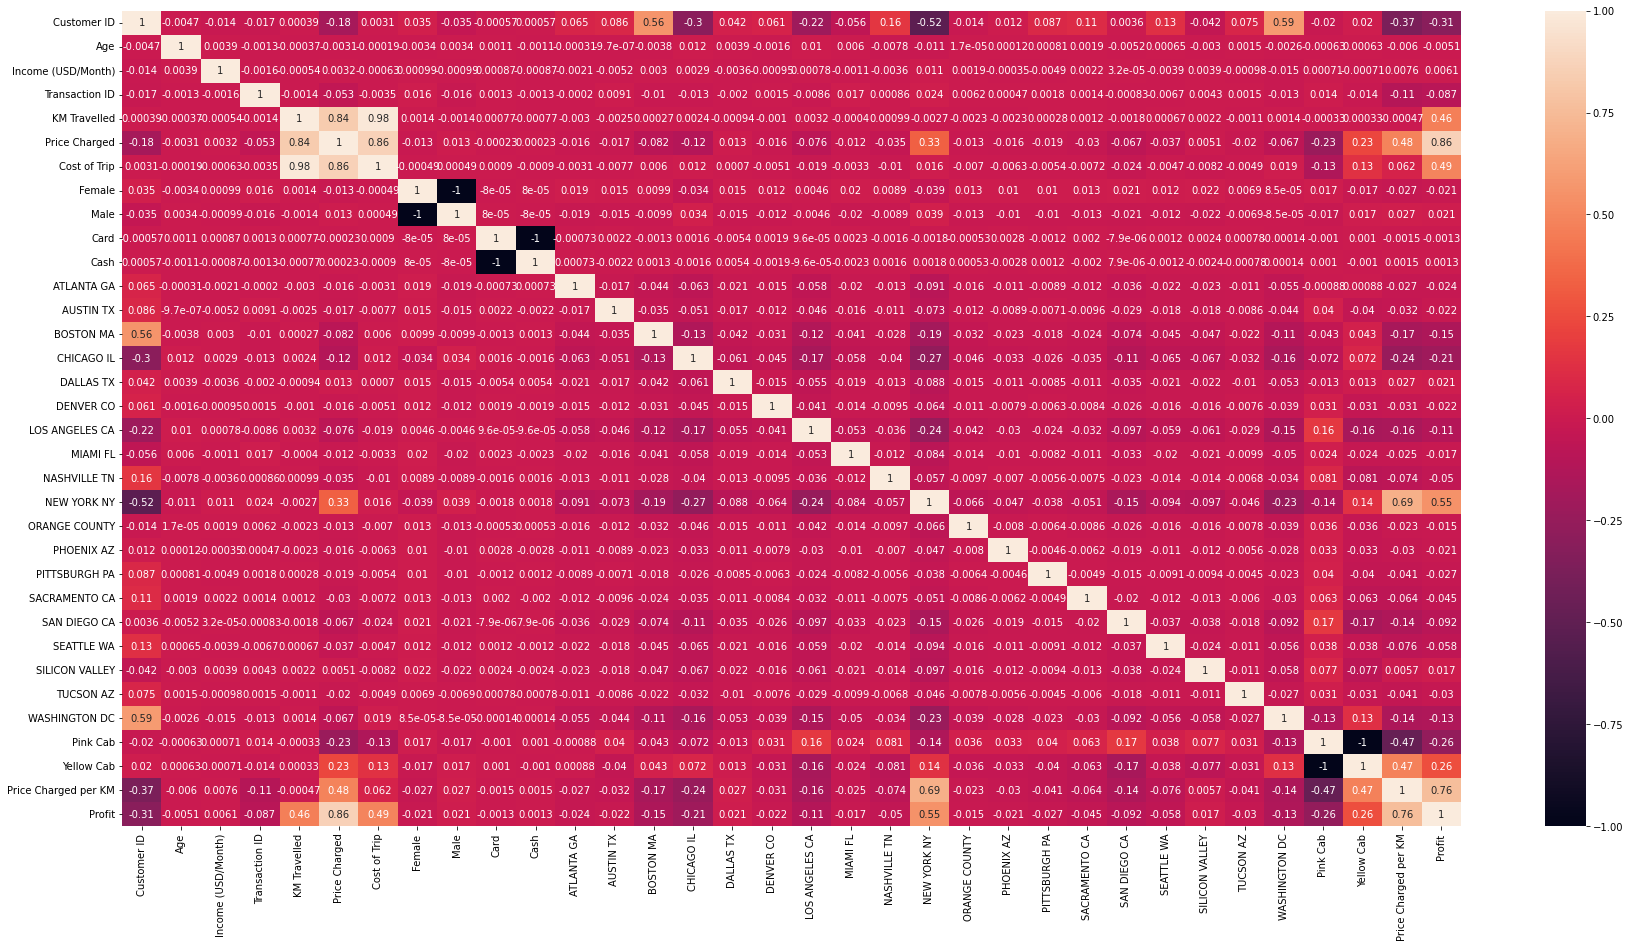

In [397]:
#covariance matrix plot
corrMatrix = df_masterdata.corr()
plt.figure(figsize = (30,15))
corr = sns.heatmap(corrMatrix, annot=True)

In [398]:
df_masterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 41 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Customer ID           359392 non-null  int64         
 1   Gender                359392 non-null  object        
 2   Age                   359392 non-null  int64         
 3   Income (USD/Month)    359392 non-null  int64         
 4   Transaction ID        359392 non-null  int64         
 5   Payment_Mode          359392 non-null  object        
 6   Company               359392 non-null  object        
 7   City                  359392 non-null  object        
 8   KM Travelled          359392 non-null  float64       
 9   Price Charged         359392 non-null  float64       
 10  Cost of Trip          359392 non-null  float64       
 11  Population            359392 non-null  object        
 12  Users                 359392 non-null  object        
 13 

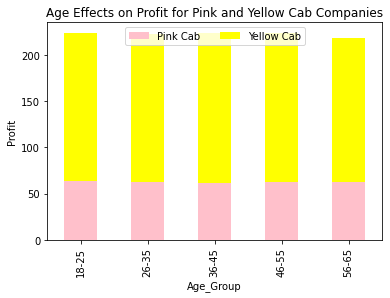

In [407]:
 #1. There is significant difference of profit with the cab companies when considering age of the customer.
# plot data in stack manner of bar type by age groups.  
# create data
def categorise(row):  
    if row['Age'] > 17 and row['Age'] <= 25:
        return '18-25'
    elif row['Age'] > 25 and row['Age'] <=35:
        return '26-35'
    elif row['Age'] >35  and row['Age'] <= 45:
        return '36-45'
    elif row['Age'] >45  and row['Age'] <= 55:
        return '46-55'
    return '56-65'
df_masterdata['Age_Group'] = df_masterdata.apply(lambda row: categorise(row), axis=1)


#Now that I added a column to my data so that I could categorize ages, I will now create 
#a bar graph to describe and compare how age groups affect Profit for the two companies.
ageprofit_grouped=df_masterdata.groupby(['Company', 'Age_Group']).agg({'Profit':['mean']})
ageprofit_grouped.columns=['Profitmean']
ageprofit_grouped=ageprofit_grouped.reset_index()
ageprofit_grouped= ageprofit_grouped.set_index(['Age_Group', 'Company']).Profitmean

ageprofit_grouped.unstack().plot(kind='bar', stacked=True, title='Age Effects on Profit for Pink and Yellow Cab Companies',ylabel='Profit', color=['pink', 'yellow'])
plt.legend(
    loc='upper center', ncol=3
)



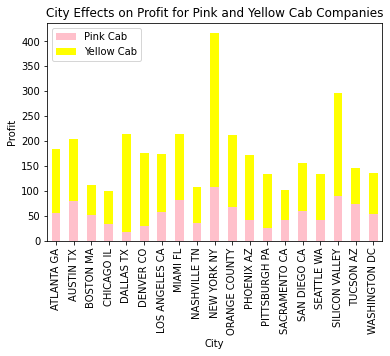

In [409]:
#2. Cities have a significant influence on profits for cab companies. I will explore this hypothesis with
# the following graph.  I can group the Company and cities and find the average profit for each city.

cityprofit_grouped=df_masterdata.groupby(['Company', 'City']).agg({'Profit':['mean']})
cityprofit_grouped.columns=['Profitmean']
cityprofit_grouped=cityprofit_grouped.reset_index()
cityprofit_grouped = cityprofit_grouped.set_index(['City', 'Company']).Profitmean
cityprofit_grouped.unstack().plot(kind='bar', stacked=True, title='City Effects on Profit for Pink and Yellow Cab Companies',ylabel='Profit', color=['pink', 'yellow'])
plt.legend(
    loc='upper left')

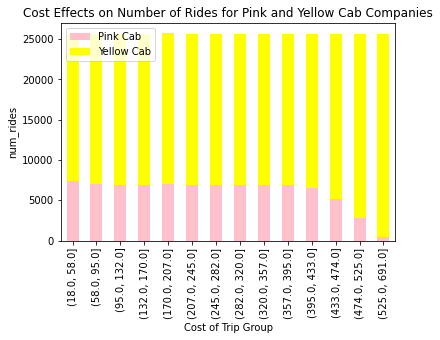

In [401]:
#3. Cost of the trip influences cab riding is the next hypothesis I can explore.
#first I can divide Cost of Trip into grouped data so that I can add an additional column to the masterdata
#and this will better allow me to see graphs relating data
df_masterdata['Cost of Trip Group']=pd.qcut(df_masterdata['Cost of Trip'], q=14, precision=0)
#df_masterdata.head()
grouped_multiple=df_masterdata.groupby(['Company', 'Cost of Trip Group']).agg({'Transaction ID':['count']})
grouped_multiple.columns=['num_rides']
grouped_multiple=grouped_multiple.reset_index()
grouped_multiple = grouped_multiple.set_index(['Cost of Trip Group', 'Company']).num_rides
grouped_multiple.unstack().plot(kind='bar', stacked=True, title='Cost Effects on Number of Rides for Pink and Yellow Cab Companies',ylabel='num_rides', color=['pink', 'yellow'])
plt.legend(
    loc='upper left')

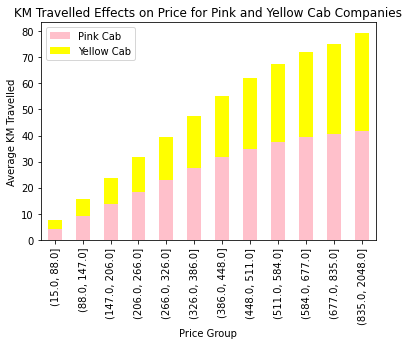

In [410]:
#Number of users and shorter distance traveled causes a difference in price of cab rides.
df_masterdata['Price Group']=pd.qcut(df_masterdata['Price Charged'], q=12, precision=0)
#First we will graph distance travelled
pricetravel_grouped=df_masterdata.groupby(['Company', 'Price Group']).agg({'KM Travelled':['mean']})
pricetravel_grouped.columns=['km_travelled']
pricetravel_grouped=pricetravel_grouped.reset_index()
pricetravel_grouped= pricetravel_grouped.set_index(['Price Group', 'Company']).km_travelled
pricetravel_grouped.unstack().plot(kind='bar', stacked=True, title='KM Travelled Effects on Price for Pink and Yellow Cab Companies',ylabel='Average KM Travelled', color=['pink', 'yellow'])
plt.legend(
    loc='upper left')

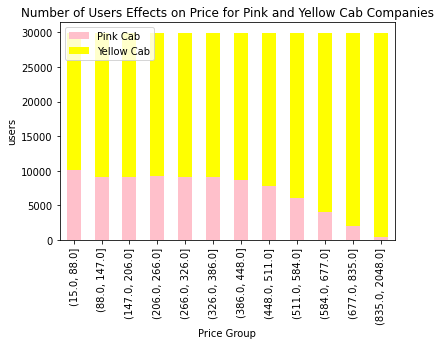

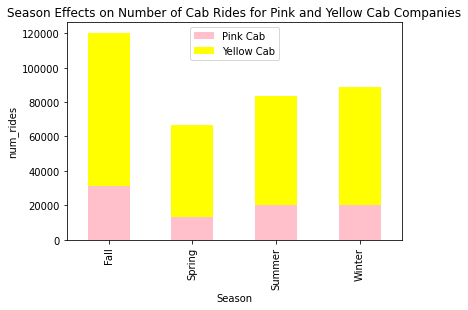

In [412]:
#next we will consider number of users

priceusers_grouped=df_masterdata.groupby(['Company', 'Price Group']).agg({'Users':['count']})
priceusers_grouped.columns=['num_users']
priceusers_grouped=priceusers_grouped.reset_index()
priceusers_grouped = priceusers_grouped.set_index(['Price Group', 'Company']).num_users
priceusers_grouped.unstack().plot(kind='bar', stacked=True, title='Number of Users Effects on Price for Pink and Yellow Cab Companies',ylabel='users', color=['pink', 'yellow'])
plt.legend(
    loc='upper left')

#5.  Geographical area and their seasons can impact the number of cab rides.
#I create a new column for months so that it will help me create a column for Seasons.
df_masterdata['month'] = pd.DatetimeIndex(df_masterdata['Date Traveled']).month
def getSeason(row):
    if row['month']>5 and row['month']<9:
        return 'Summer'
    elif row['month']>2 and row['month']<6:
        return 'Spring'
    elif row['month']>8 and row['month']<12:
        return'Fall'
    return 'Winter'
df_masterdata['Season'] = df_masterdata.apply(lambda row: getSeason(row), axis=1)
seasonriders_grouped=df_masterdata.groupby(['Company', 'Season']).agg({'Transaction ID':['count']})
seasonriders_grouped.columns=['num_rides']
seasonriders_grouped=seasonriders_grouped.reset_index()
seasonriders_grouped = seasonriders_grouped.set_index(['Season', 'Company']).num_rides
seasonriders_grouped.unstack().plot(kind='bar', stacked=True, title='Season Effects on Number of Cab Rides for Pink and Yellow Cab Companies',ylabel='num_rides', color=['pink', 'yellow'])
plt.legend(
    loc='upper center')


In [404]:
df_masterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 46 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Customer ID           359392 non-null  int64         
 1   Gender                359392 non-null  object        
 2   Age                   359392 non-null  int64         
 3   Income (USD/Month)    359392 non-null  int64         
 4   Transaction ID        359392 non-null  int64         
 5   Payment_Mode          359392 non-null  object        
 6   Company               359392 non-null  object        
 7   City                  359392 non-null  object        
 8   KM Travelled          359392 non-null  float64       
 9   Price Charged         359392 non-null  float64       
 10  Cost of Trip          359392 non-null  float64       
 11  Population            359392 non-null  object        
 12  Users                 359392 non-null  object        
 13 